# 6.3 Geographic Visualization 

### This script contains the following:
#### 1. Import data and libraries
#### 2. Data wrangling
#### 3. Data cleaning
#### 4. Plotting a choropleth

### 1. Import data and libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

In [2]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [3]:
# Import ".json" file for districts in Madrid

district_geo_path=r'C:\Users\carol\Documents\Airbnb\Original Data\neighbourhoods.geojson'
district_geo_open=open(district_geo_path,)
geo_data=json.load(district_geo_open)

# Iterating through the json list
for i in geo_data['features']:
    print(i)

{'type': 'Feature', 'geometry': {'type': 'MultiPolygon', 'coordinates': [[[[-3.705931, 40.420287], [-3.706339, 40.420173], [-3.708116, 40.420238], [-3.707915, 40.419867], [-3.708, 40.419629], [-3.708138, 40.419165], [-3.708189, 40.418886], [-3.70845, 40.4184], [-3.708474, 40.41836], [-3.708525, 40.418273], [-3.708781, 40.417828], [-3.70858, 40.417797], [-3.708674, 40.417218], [-3.708703, 40.417113], [-3.708726, 40.417023], [-3.708687, 40.416779], [-3.708685, 40.41676], [-3.708655, 40.416489], [-3.708624, 40.416377], [-3.708696, 40.416293], [-3.708666, 40.41598], [-3.708718, 40.41585], [-3.708811, 40.415581], [-3.708609, 40.415327], [-3.708547, 40.415322], [-3.708482, 40.415319], [-3.708432, 40.415287], [-3.708188, 40.414745], [-3.708032, 40.414523], [-3.708116, 40.414111], [-3.708259, 40.413717], [-3.707725, 40.413577], [-3.707478, 40.413519], [-3.707429, 40.413339], [-3.707574, 40.412587], [-3.707716, 40.412472], [-3.708234, 40.411359], [-3.708428, 40.411259], [-3.708483, 40.411168], 

In [4]:
# Extract district names from GeoJSON
geo_districts = [feature['properties']['neighbourhood_group'] for feature in geo_data['features']]
# Extract unique district names
unique_geo_districts = set(geo_districts)

# Print the unique district names
print(unique_geo_districts)

{'Retiro', 'Hortaleza', 'Carabanchel', 'Puente de Vallecas', 'Villa de Vallecas', 'Moratalaz', 'Fuencarral - El Pardo', 'ChamberÃ\xad', 'San Blas - Canillejas', 'ChamartÃ\xadn', 'Salamanca', 'VicÃ¡lvaro', 'Barajas', 'Arganzuela', 'Centro', 'TetuÃ¡n', 'Villaverde', 'Moncloa - Aravaca', 'Ciudad Lineal', 'Usera', 'Latina'}


In [5]:
# Create a dictionary to map old names to standardized names

name_corrections = {
    'VicÃ¡lvaro':'Vicálvaro',
    'ChamartÃ\xadn':'Chamartín',
    'ChamberÃ\xad':'Chamberí',
    'TetuÃ¡n':'Tetuán',}

In [6]:
# Standardize district names by replacing old names with corrected ones
standardized_geo_districts = {name_corrections.get(district, district) for district in geo_districts}

In [7]:
# Print the standardized district names
print(standardized_geo_districts)

{'Retiro', 'Hortaleza', 'Carabanchel', 'Puente de Vallecas', 'Villa de Vallecas', 'Moratalaz', 'Fuencarral - El Pardo', 'Tetuán', 'San Blas - Canillejas', 'Vicálvaro', 'Salamanca', 'Barajas', 'Chamberí', 'Arganzuela', 'Centro', 'Villaverde', 'Moncloa - Aravaca', 'Ciudad Lineal', 'Usera', 'Latina', 'Chamartín'}


In [8]:
#Create data path

path=r'C:\Users\carol\Documents\Airbnb\Prepared Data'

In [9]:
# Import the type of properties data

df = pd.read_csv(os.path.join(path,'df_listings_merged3.csv'),encoding='utf-8')

In [10]:
df.head()

,Unnamed: 0,listing_id,listing_url,scrape_id,last_scraped,source,name_x,description,neighborhood_overview,picture_url,...,room_type_y,price_y,minimum_nights_y,number_of_reviews_y,last_review_y,reviews_per_month_y,calculated_host_listings_count_y,availability_365_y,number_of_reviews_ltm_y,license_y
0,0,51647382.0,https://www.airbnb.com/rooms/51647382,2.020000e+13,15/06/2024,city scrape,Buenos Aires en Madrid,"This special place is close to everything, mak...",The neighborhood is m,https://a0.muscache.com/pictures/db018af4-f622...,...,Private room,25.0,1,186,2024-05-29,5.40,2,356,65,NaN
1,1,52547327.0,https://www.airbnb.com/rooms/52547327,2.020000e+13,15/06/2024,city scrape,Private room in the center of Madrid,You will be close to everything when you stay ...,NaN,https://a0.muscache.com/pictures/d4836bdc-ede3...,...,Private room,45.0,1,30,2024-05-15,0.95,7,364,6,NaN
2,2,35987869.0,https://www.airbnb.com/rooms/35987869,2.020000e+13,15/06/2024,previous scrape,"Beautiful,spacious room in centrally-located flat",NaN,NaN,https://a0.muscache.com/pictures/a1b6eb62-429c...,...,Private room,110.0,3,0,NaN,NaN,1,0,0,NaN
3,3,36412220.0,https://www.airbnb.com/rooms/36412220,2.020000e+13,15/06/2024,previous scrape,Cama calle de redentor,Cama grande y confortable,NaN,https://a0.muscache.com/pictures/4b3389f9-1aa3...,...,Private room,110.0,1,0,NaN,NaN,1,0,0,NaN
4,4,19032176.0,https://www.airbnb.com/rooms/19032176,2.020000e+13,15/06/2024,previous scrape,San Vicente,Quiet place essential to have a car 10 minutes...,NaN,https://a0.muscache.com/pictures/dd093dbc-8613...,...,Shared room,110.0,1,0,NaN,NaN,1,0,0,NaN


In [11]:
df.shape

(11767, 93)

## Data Wrangling

### Fix Dummy Columns

In [12]:
# Standarize distict name on column 'district_x' from csv
df['district_standardized'] = df['district_x'].replace(name_corrections)

In [13]:
# Extract district names from GeoJSON
unique_names = df['district_x'].unique()

# Print the unique district names
print(unique_names)

['Puente de Vallecas' 'Centro' 'Arganzuela' 'Carabanchel' 'Barajas'
 'Latina' 'Chamberí' 'Usera' 'Salamanca' 'San Blas - Canillejas'
 'Moncloa - Aravaca' 'Hortaleza' 'Villaverde' 'Villa de Vallecas' 'Tetuán'
 'Retiro' 'Fuencarral - El Pardo' 'Chamartín' 'Vicálvaro' 'Ciudad Lineal'
 'Moratalaz']


In [17]:
# Select only the necessary columns and put them in a list called columns

columns = [ 'district_standardized',
"host_total_listings_count",
"calculated_host_listings_count_entire_homes",
"calculated_host_listings_count_private_rooms",        
"calculated_host_listings_count_shared_rooms",
"number_of_reviews_x",
"price_y"
]

In [18]:
district_rec=df[columns]

In [34]:
# Rename columns in the district_rec DataFrame

district_rec = district_rec.rename(columns={
    'district_standardized':'districts',
    'host_total_listings_count': 'listings_count',
    'calculated_host_listings_count_entire_homes': 'entire_homes_count',
    'calculated_host_listings_count_private_rooms':'private_rooms_count',
    'calculated_host_listings_count_shared_rooms':'shared_rooms_count',
    'number_of_reviews_x':'number_of_reviews'
})

In [35]:
# Display the first few rows to check
district_rec.head()

,districts,listings_count,entire_homes_count,private_rooms_count,shared_rooms_count,number_of_reviews,price_y
0,Puente de Vallecas,2.0,0,2,0,186,25.0
1,Centro,8.0,2,5,0,30,45.0
2,Arganzuela,2.0,0,1,0,0,110.0
3,Carabanchel,1.0,0,1,0,0,110.0
4,Barajas,1.0,0,0,1,0,110.0


In [31]:
type(district_rec)

pandas.core.frame.DataFrame

## Conduct Consistency check

In [32]:
# Check for missing values

district_rec.isnull().sum()

district_standardized    0
listings_count           4
entire_homes_count       0
private_rooms_count      0
shared_rooms_count       0
number_of_reviews        0
price_y                  0
dtype: int64

**Note** no adjustment will be completed. 

### Duplicate check

In [23]:
dups = district_rec.duplicated()

In [24]:
dups.shape # no dups

(11767,)

### Extreme  values check

<Axes: xlabel='price_y', ylabel='Count'>

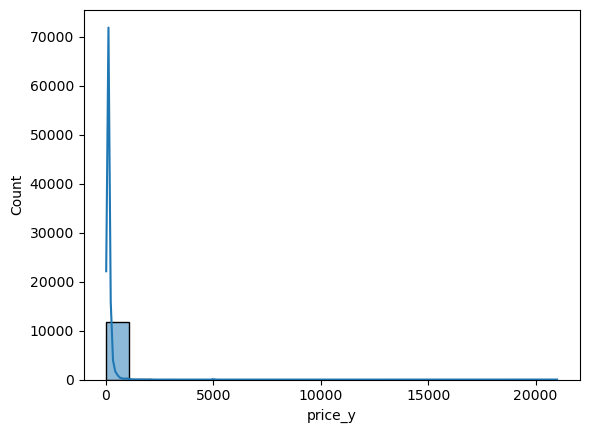

In [26]:
sns.histplot(district_rec['price_y'], bins=20, kde = True) # shows extreme values for 'fat'

In [36]:
# Check how many extreme values

district_rec[district_rec['price_y'] >500]

,districts,listings_count,entire_homes_count,private_rooms_count,shared_rooms_count,number_of_reviews,price_y
41,Centro,1.0,1,0,0,0,900.0
165,Salamanca,15.0,6,0,0,180,593.0
183,Centro,1.0,1,0,0,0,1000.0
232,Moratalaz,1.0,1,0,0,0,900.0
237,Puente de Vallecas,11.0,1,0,0,0,21000.0
...,...,...,...,...,...,...,...
11337,Centro,12.0,0,1,5,2,1000.0
11425,Centro,30.0,26,0,0,90,686.0
11554,Centro,2.0,2,0,0,126,735.0
11746,Centro,30.0,22,0,0,185,631.0


In [41]:
# Clean extreme values

district_rec2 = district_rec[district_rec['price_y'] < 500] 

#209 rows out of 11767 (1.77%)

<Axes: xlabel='price_y', ylabel='Count'>

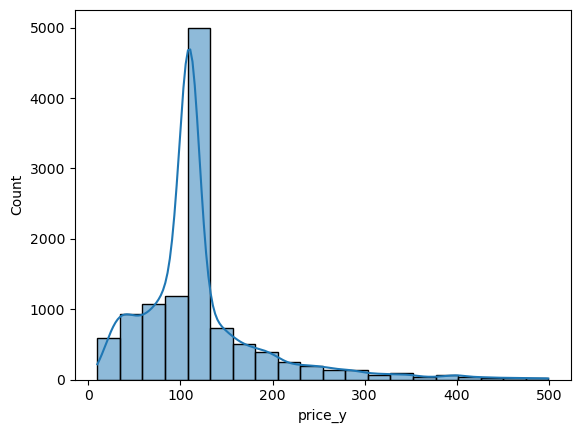

In [42]:
sns.histplot(district_rec['price_y'], bins=20, kde = True) 

<Axes: xlabel='number_of_reviews', ylabel='Count'>

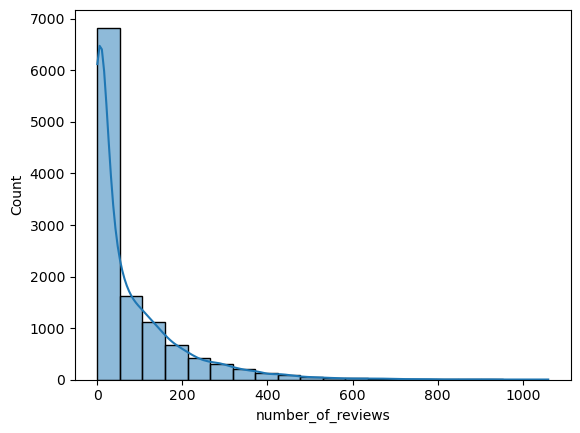

In [43]:
#Create histogram for number_of_reviews

sns.histplot(district_rec['number_of_reviews'], bins=20, kde = True)

<Axes: xlabel='listings_count', ylabel='Count'>

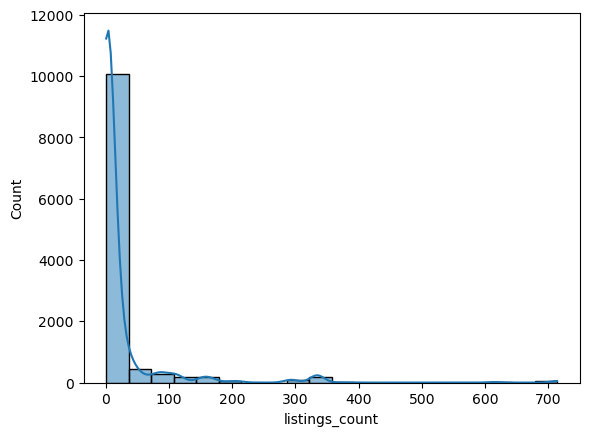

In [44]:
#Create histogram for listings_count	

sns.histplot(district_rec['listings_count'], bins=20, kde = True)

In [45]:
#Clean extreme values over 350 

district_rec2 = district_rec[district_rec['listings_count'] < 500] 

<Axes: xlabel='listings_count', ylabel='Count'>

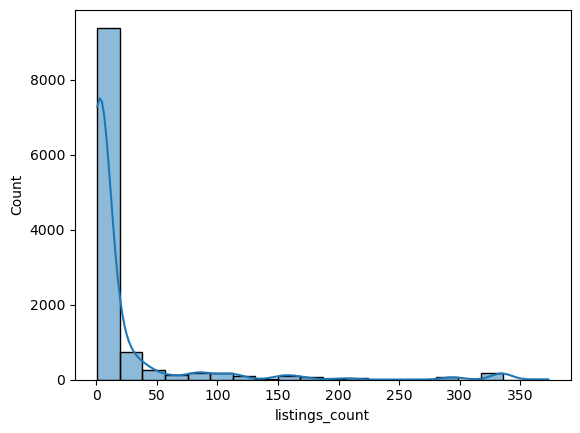

In [47]:
sns.histplot(district_rec2['listings_count'], bins=20, kde = True)

In [48]:
district_rec2.dtypes

districts               object
listings_count         float64
entire_homes_count       int64
private_rooms_count      int64
shared_rooms_count       int64
number_of_reviews        int64
price_y                float64
dtype: object

## Plotting a Choropleth

In [49]:
# Create a data frame with just the districts and the values for price_y we want plotted

data_to_plot = district_rec2[['districts','price_y']]
data_to_plot.head()

,districts,price_y
0,Puente de Vallecas,25.0
1,Centro,45.0
2,Arganzuela,110.0
3,Carabanchel,110.0
4,Barajas,110.0


In [50]:
# Update GeoJSON 'neighbourhood_group' with standardized names
for feature in geo_data['features']:
    district_name = feature['properties']['neighbourhood_group']
    standardized_name = name_corrections.get(district_name, district_name)
    feature['properties']['neighbourhood_group'] = standardized_name

# Now 'geo_data' has updated names in 'neighbourhood_group'

In [52]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps chekcing the density on price on each district

folium.Choropleth(
    geo_data = district_geo_path, 
    data = data_to_plot,
    columns = ['districts','price_y'],
    key_on = 'feature.properties.neighbourhood_group',
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "price").add_to(map)
folium.LayerControl().add_to(map)

map

## 1. Color Scale:

The color gradient at the top of the map goes from yellow to dark brown/black.
The lightest color (yellow) corresponds to lower prices, while the darkest color (black) corresponds to higher prices. The exact price values are listed above the color gradient, starting at around 42 and increasing to 311.

## 2.Highlighted Districts:

Darker areas in the center of Madrid (specifically in the city center) indicate the highest average property prices.
Lighter areas, mainly on the outskirts of Madrid, indicate lower prices.

## 3.Geographical Distribution:

The central districts (like Centro, Salamanca, Chamberí) seem to have higher Airbnb property prices compared to districts further from the city center, like Fuencarral-El Pardo or districts towards the southern end.

In [59]:
# Save the folium map as an HTML file
save_path = r'C:\Users\carol\Documents\Airbnb\Visualizations\plot_map.html'
map.save(save_path)

In [54]:
# Create a data frame with just the districts and the values for reviews we want plotted

data_to_plot2 = district_rec[['districts','number_of_reviews']]
data_to_plot2.head()

,districts,number_of_reviews
0,Puente de Vallecas,186
1,Centro,30
2,Arganzuela,0
3,Carabanchel,0
4,Barajas,0


In [74]:
# Setup a folium map at a high-level zoom
map2 = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth for number of reviews per district
folium.Choropleth(
    geo_data = district_geo_path, 
    data = data_to_plot2,
    columns = ['districts','number_of_reviews'],
    key_on = 'feature.properties.neighbourhood_group',
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "number_of_reviews"
).add_to(map2)

# Add layer control to the map
folium.LayerControl().add_to(map2)

# Render the map for number_of_reviews
map2

## 1. Color Intensity and Review Density:

The color intensity of the districts seems to correlate with the number of reviews. Darker shades likely indicate higher review activity.
The central districts, including Madrid, Chamberí, Salamanca, and Retiro, appear to have the highest review density.

## 2. Outer Districts:
The outer districts generally exhibit lower review activity, indicated by lighter shades.
This could be due to factors such as lower population density, fewer tourist attractions, or less Airbnb availability.

In [62]:
# Save the folium map as an HTML file
save_path = r'C:\Users\carol\Documents\Airbnb\Visualizations\plot2_map_reviews.html'
map2.save(save_path)

In [72]:
# Create a data frame with just the districts and the values for listings_count we want plotted

data_to_plot = district_rec[['districts','listings_count']]
data_to_plot.head()

,districts,listings_count
0,Puente de Vallecas,2.0
1,Centro,8.0
2,Arganzuela,2.0
3,Carabanchel,1.0
4,Barajas,1.0


In [75]:
# Setup a folium map at a high-level zoom
map3 = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth for number of listings per district
folium.Choropleth(
    geo_data = district_geo_path, 
    data = data_to_plot,
    columns = ['districts','listings_count'],
    key_on = 'feature.properties.neighbourhood_group',
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "listings_count"
).add_to(map3)

# Add layer control to the map
folium.LayerControl().add_to(map3)

# Render the map for listings_count
map3

## 1. Districts with high Airbnb listings:

Darker colors (black to deep brown) represent areas with a higher number of listings.

From the map, the central and southern areas, particularly districts around Madrid's city center, have the highest density of listings. These could be high-demand locations for Airbnb rentals due to their proximity to popular tourist attractions or business areas.

## 2. Districts with lower Airbnb listings:

Lighter shades (yellow to light brown) represent areas with fewer Airbnb listings.

Northern districts and areas on the outskirts of Madrid seem to have #fewer listings. These areas are likely more residential or farther from the city center, where there's less demand for short-term rentals.

## 3. Insights:

Central Madrid (darker areas) dominates the Airbnb listings, possibly driven by tourism, business travelers, and a greater concentration of attractions.

Peripheral districts have much lower listings, reflecting the lesser demand or a more residential character, where short-term rentals are either less common or regulated.

In [ ]:
# Save the folium map as an HTML file
save_path = r'C:\Users\carol\Documents\Airbnb\Visualizations\plot2_map_li.html'
map2.save(save_path)